In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

In [4]:
df = pd.read_csv(r"C:\Users\Faizan\Downloads\Dataset .csv")

In [5]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

## Task 1: Restaurant Reviews Analysis
## Identifies common positive and negative sentiments from customer reviews.
## Visualizes the distribution of positive vs. negative sentiments.

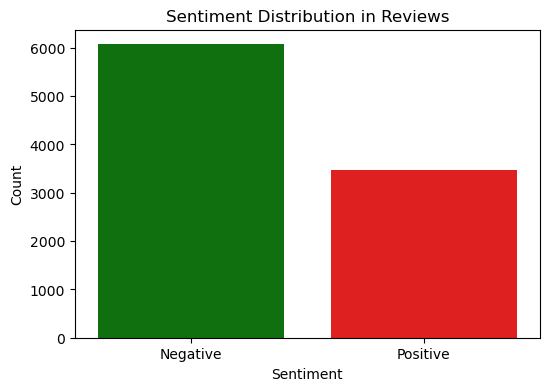

In [3]:
positive_keywords = ['Excellent', 'Very Good', 'Good']
negative_keywords = ['Average', 'Poor', 'Very Poor']
df['Sentiment'] = df['Rating text'].apply(lambda x: 'Positive' if x in positive_keywords else 'Negative')
sentiment_counts = df['Sentiment'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=['green', 'red'])
plt.title("Sentiment Distribution in Reviews")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

## Task 2: Votes Analysis
## Finds the highest and lowest voted restaurants.
## Examines the correlation between votes and restaurant ratings.

Highest Voted Restaurant: Restaurant Name     Toit
Votes              10934
Name: 728, dtype: object
Lowest Voted Restaurant: Restaurant Name    Cantinho da Gula
Votes                             0
Name: 69, dtype: object


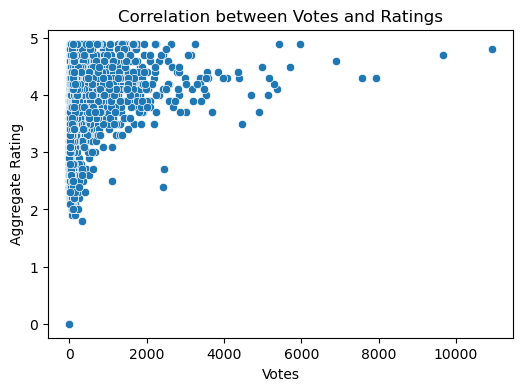

In [4]:
highest_voted_restaurant = df.loc[df['Votes'].idxmax(), ['Restaurant Name', 'Votes']]
lowest_voted_restaurant = df.loc[df['Votes'].idxmin(), ['Restaurant Name', 'Votes']]
print("Highest Voted Restaurant:", highest_voted_restaurant)
print("Lowest Voted Restaurant:", lowest_voted_restaurant)
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df['Votes'], y=df['Aggregate rating'])
plt.title("Correlation between Votes and Ratings")
plt.xlabel("Votes")
plt.ylabel("Aggregate Rating")
plt.show()

##  Task 3: Price Range vs. Online Delivery and Table Booking
## Analyzes whether expensive restaurants are more likely to offer table booking and online delivery.
## Uses bar charts to compare price ranges with service availability.

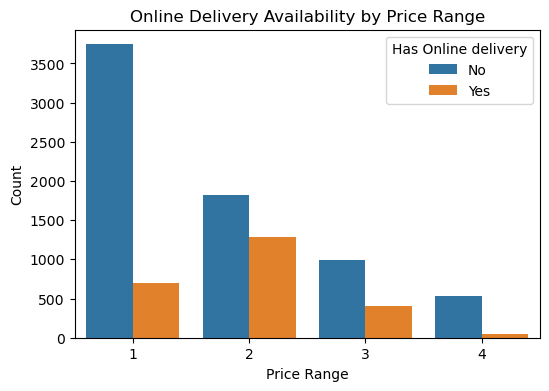

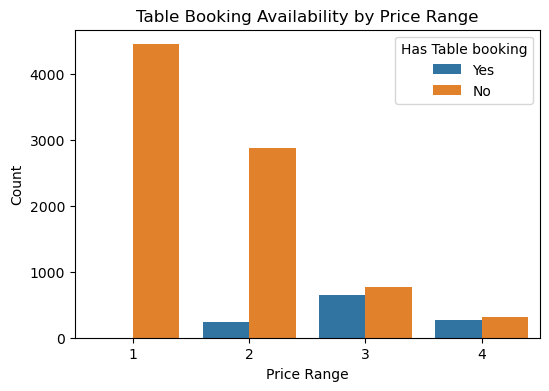

In [6]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Price range', hue='Has Online delivery', data=df)
plt.title("Online Delivery Availability by Price Range")
plt.xlabel("Price Range")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x='Price range', hue='Has Table booking', data=df)
plt.title("Table Booking Availability by Price Range")
plt.xlabel("Price Range")
plt.ylabel("Count")
plt.show()